<b>Problem Statement</b><br>
If I were a real estate developer I would be interested in aggregating multiple sources of listing and mortgage data in a specific neighborhood, correlating to the larger market and using this to identify the most opportune time to sell assets and re-capitalize. In simpler terms, I want to know if we are approaching another market peak and the opportune time to sell.

<b>Summary Conculsions:</b><br>
- The Long Island City Real Estate Market is closely correlated to larger market performance i.e. Case-Shiller
- The larger market appears to be approaching another peak, similar to the approach in 2007
- There has been a steady year-on-year increase in development activity in the Long Island City area as identified by filed building permits<br>

These three analyses indicate that the market is approaching a high, that means as a real estate developer I would assume that it would be a good time to sell assets and re-capitalize in the near-future. The following sections will detail each of these analyses.<br><br>

<b>Data Sources</b> <br>
"In God we trust, all others bring data" - W. Edwards Deming
- Zillow - Sales data by zip code per month<br>
  Source: http://www.zillow.com/research/data/
- Case Shiller - 10 City Index per quarter<br>
  Source: https://research.stlouisfed.org/fred2/series/SPCS10RSA/downloaddata
- NYC Open Data - Department of Buildings Permit Issuances<br>
  Source: https://data.cityofnewyork.us/data

In [35]:
%matplotlib inline
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats
pylab.rcParams['figure.figsize'] = 14, 10

I chose to load the csv data as Pandas dataframe to make selecting and slicing simpler. 

In [36]:
casedf = pd.read_csv('~/Downloads/SPCS10RSA.csv')
zillowdf = pd.read_csv('~/Downloads/Zip_Zhvi_AllHomes.csv')
print casedf.info()
print zillowdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 2 columns):
DATE     115 non-null object
VALUE    115 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13058 entries, 0 to 13057
Columns: 242 entries, RegionID to 2015-10
dtypes: float64(201), int64(37), object(4)
memory usage: 24.2+ MB
None


The Case-Shiller data looks to be "long", with two columns representing the quarter and the aggregated city values. The Zillow data on the other hand has numerous columns which represent months horizontally, additionally there are some missing values in the Zillow data.

In [37]:
print casedf.head()
print zillowdf.head()

         DATE  VALUE
0  1987-01-01  63.78
1  1987-04-01  65.79
2  1987-07-01  67.73
3  1987-10-01  69.62
4  1988-01-01  71.25
   RegionID  RegionName      City State                               Metro  \
0     62080       11368  New York    NY                            New York   
1     93144       79936   El Paso    TX                             El Paso   
2     84630       60629   Chicago    IL                             Chicago   
3     96193       90650   Norwalk    CA  Los Angeles-Long Beach-Anaheim, CA   
4     62037       11226  New York    NY                            New York   

    CountyName  SizeRank  1996-04  1996-05  1996-06   ...     2015-01  \
0       Queens         1      NaN      NaN      NaN   ...      353200   
1      El Paso         2    70800    71000    71000   ...      111500   
2         Cook         3    93100    93100    92900   ...      134300   
3  Los Angeles         4   144500   144300   143900   ...      373300   
4        Kings         5      NaN 

I changed the DATE column in the Case-Shiller dataframe to be datetime

In [38]:
casedf['DATE'] = pd.to_datetime(casedf['DATE'])

Sliced to get just the values that are needed for the analysis. In this case data from 2010 on.

In [39]:
casedf = casedf.ix[92:]
print casedf

          DATE   VALUE
92  2010-01-01  159.68
93  2010-04-01  160.14
94  2010-07-01  158.82
95  2010-10-01  156.82
96  2011-01-01  155.42
97  2011-04-01  153.99
98  2011-07-01  153.14
99  2011-10-01  151.03
100 2012-01-01  149.92
101 2012-04-01  152.15
102 2012-07-01  155.13
103 2012-10-01  158.20
104 2013-01-01  162.82
105 2013-04-01  169.60
106 2013-07-01  174.91
107 2013-10-01  179.95
108 2014-01-01  184.07
109 2014-04-01  185.44
110 2014-07-01  184.83
111 2014-10-01  187.54
112 2015-01-01  192.26
113 2015-04-01  193.88
114 2015-07-01  193.70


Now, on to the Zillow data. As mentioned, the raw data is in "wide" format where the variables (columns) are in month increments and the observations (rows) are the neighborhoods by zip code. For linear regression the n, number of observations, for both the x and y values have to be the same. I dropped the columns not needed (in this case the values were coincidentally not present up until 2010), selected the "row" that matched to Long Island City (zip code 11101), and then transposed the data to match the "long" format of the Case-Shiller data and also for plotting.

In [40]:
colcounter = range(0, 172)
licdata = zillowdf.drop(zillowdf.columns[[colcounter]], axis=1)
licdata = licdata[2998:2999].T

The other complication with the Zillow data is that it was by month, and the Case-Shiller data was by quarter. When data gives you lemons, you make lemonade. The following code droppped the columns I did not need.

In [41]:
excludelist = []
years = ['2010', '2011', '2012', '2013', '2014', '2015']
months = ['02', '03', '05', '06', '08', '09', '11', '12']
for i in years:
    for j in months:
        excludelist.append(str(i) + "-" + str(j))
# manually dropping the last two months in 2015 as they are not present in the data
del excludelist[-2:]
licdata = licdata.drop(excludelist, axis=0)
licdata = licdata.ix[:-1]
print licdata

           2998
2010-01  493800
2010-04  541400
2010-07  590000
2010-10  620100
2011-01  635800
2011-04  625800
2011-07  614000
2011-10  593000
2012-01  569900
2012-04  568000
2012-07  619100
2012-10  630300
2013-01  643800
2013-04  651500
2013-07  670600
2013-10  734800
2014-01  802500
2014-04  787700
2014-07  766100
2014-10  793700
2015-01  791700
2015-04  751400
2015-07  675600


And yet another wrinkle was that the scale of the Case-Shiller data was format shortened by decimal (common with large amounts in Finance), where the Zillow Data was actual. I shifted the decimal and then "squeezed" both dataframes to ensure that they would be able to be plotted.

In [42]:
Y = np.array(licdata[[2998]])
Y = Y/1000
Y = Y.squeeze()
X = np.array(casedf[['VALUE']])
X = X.squeeze()

Finally, the linear regression available through SciPy

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print "Slope: ", slope
print "R-value: ", r_value

Slope:  4.77832659201
R-value:  0.843670354844


The r_value is 0.8437, close to 1. This indicates that there is a strong linear relationship between x - Case-Shiller 10-City Index data, and y - residential sales data for Long Island City, NY (zip 11101). As the prices increase in x, they also increase on y.<br>
This isn't entirely surprising, as New York City is one of the cities where its real estate sales data is used to create the Case-Shiller index. What was unexpected was how strong this relationship was. A long-time argument with developers in New York City is that the market here was very "special" and does not always adhere to the same rules as the rest of the country. In this case, that does not seem to hold true.

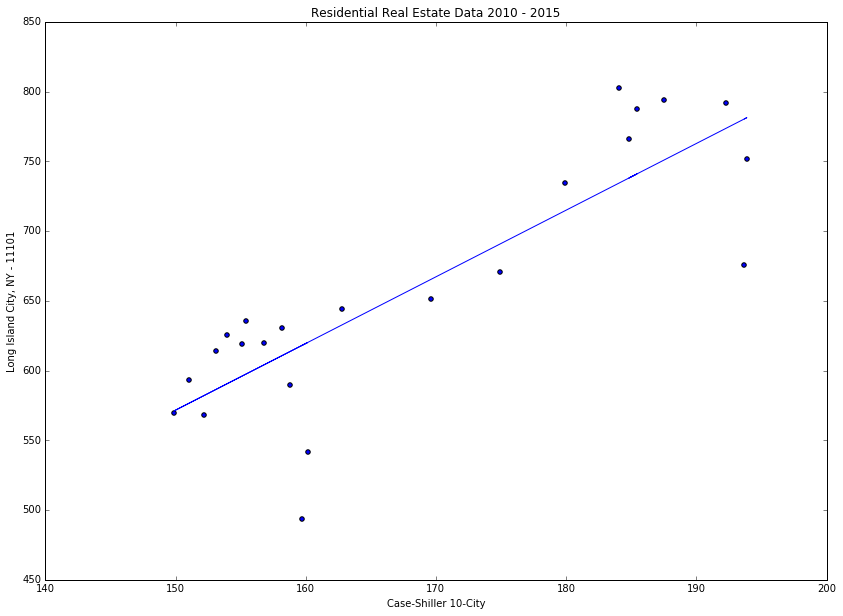

In [44]:
plt.scatter(X, Y)
plt.plot(X, slope*X + intercept)
plt.ylabel('Long Island City, NY - 11101')
plt.xlabel('Case-Shiller 10-City')
plt.title('Residential Real Estate Data 2010 - 2015')
plt.show()

<b>Analysis 1 - Strong correlation of Long Island City Residential Sales to the larger market</b><br>
The plot of the data, along with the regression line demonstrating the r-value of 0.8437 and a strong correlation indicates that sales in this neighborhood generally follow the trend of the larger market place. This answers the first part of the problem statement.<br><br>
Next, we take a look at the Case-Shiller index on a longer timescale (2000-2015) to determine if it is approaching another high.

In [45]:
casedf = pd.read_csv('~/Downloads/SPCS10RSA.csv')
casedf = casedf.ix[52:]
casedf['DATE'] = pd.to_datetime(casedf['DATE'])
X = np.array(casedf[['DATE']])
Y = np.array(casedf[['VALUE']])
X = X.squeeze()
Y = Y.squeeze()

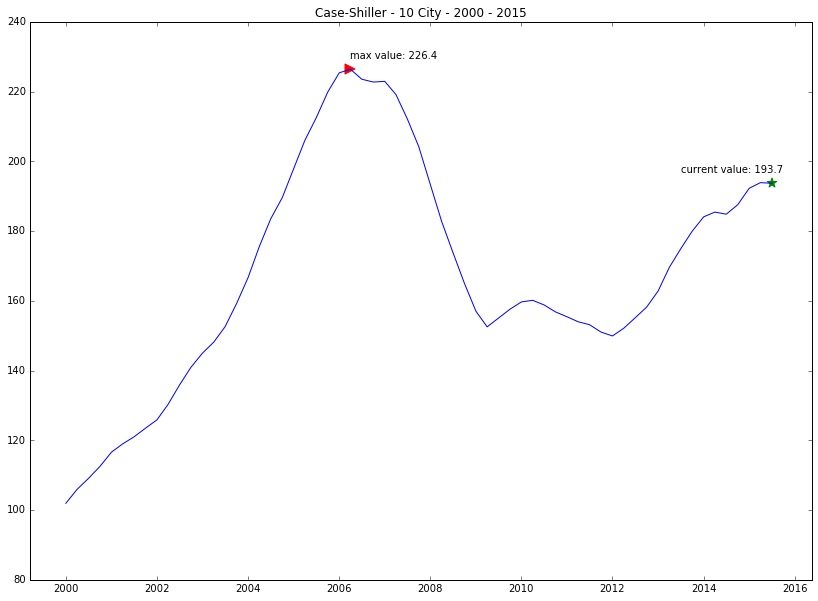

In [46]:
maxYvalue = max(Y)
maxresult = casedf.loc[casedf['VALUE'] == maxYvalue]
current = Y[-1]
dx = maxresult[['DATE']].squeeze()
plt.plot(X, Y)
plt.scatter(dx, maxYvalue, color='red', marker='>', s=100)
plt.annotate('max value: %s' % maxYvalue, xy=(dx, maxYvalue+3))
plt.scatter('2015-07-01 00:00:00', current, color='green', marker='*', s=100)
plt.annotate('current value: %s' % current, xy=('2013-07-01 00:00:00', current+3))
plt.title('Case-Shiller - 10 City - 2000 - 2015')
plt.show()

<b>Analysis 2 - Market approaching peak</b><br>
As you can see from the plot, the max value according to the Case-Shiller index was 226,400 right before the market popped in 2008 and the last set of data for 2015 was 193,700. This, along with the shape of the graph from 2012 on indicate that prices are indeed on the rise again and likely heading to another peak. <br><br>
However, predicting any market using trailing data is next to impossible. There is just too much variability in the world for it to be accurate using trailing data indicators as a basis for decision making. There may be a data variable available that can help due to natural lag in the process; Building Permit applications.<br>
In New York City, all real estate developers or contractors that want to perform work need to submit applications to the Department of Buildings. NYC Open Data does capture some of this information that we might be able to use to determine if there is an increase in applications, vis-a-vis an increase in development ultimately driving prices up.

Let's begin by loading the NYC Open Data Building Permit Data. The Open Data website makes some prefiltering possible, in this case I downloaded all the available data in the 11101 zip code.

In [47]:
nycopendata = pd.read_csv('~/Downloads/DOB_Permit_Issuance-3a.csv')
print nycopendata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5613 entries, 0 to 5612
Data columns (total 54 columns):
BOROUGH                             5613 non-null object
Bin #                               5613 non-null int64
House #                             5613 non-null object
Street Name                         5613 non-null object
Job #                               5613 non-null int64
Job doc. #                          5613 non-null int64
Job Type                            5613 non-null object
Self_Cert                           3045 non-null object
Block                               5613 non-null int64
Lot                                 5613 non-null int64
Community Board                     5613 non-null int64
Zip Code                            5613 non-null int64
Bldg Type                           5613 non-null int64
Residential                         1732 non-null object
Special District 1                  2567 non-null object
Special District 2                  3 non-null

There's quite a lot of data available in this dataset, I dropped the columns of no interest and pared the variables down to just Permit Type and Filing Date

In [48]:
colcounter = range(0, 19)
nycopendata = nycopendata.drop(nycopendata.columns[[colcounter]], axis=1)
colcounter = range(6, 35)
nycopendata = nycopendata.drop(nycopendata.columns[[colcounter]], axis=1)
colcounter = range(1, 5)
nycopendata = nycopendata.drop(nycopendata.columns[[colcounter]], axis=1)
print nycopendata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5613 entries, 0 to 5612
Data columns (total 2 columns):
Permit Type    5613 non-null object
Filing Date    5613 non-null object
dtypes: object(2)
memory usage: 131.6+ KB
None


Changed to DateTime format and filtered for the specific permit types that are indicative of an increase in real estate development; in this case everything except PL - Plumbing or SG - Sign

In [49]:
nycopendata = nycopendata[(nycopendata['Permit Type'] != 'PL') | (nycopendata['Permit Type'] == 'SG')]
print nycopendata.info()
print nycopendata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4831 entries, 0 to 5612
Data columns (total 2 columns):
Permit Type    4831 non-null object
Filing Date    4831 non-null object
dtypes: object(2)
memory usage: 113.2+ KB
None
  Permit Type Filing Date
0          AL    12/18/15
1          EQ    12/18/15
2          FO    12/18/15
3          AL    12/17/15
4          NB    12/18/15


I determined the amount of permits filed by quarter, staying consistent with the other timescales.

In [50]:
nycopendata['Filing Date'] = pd.to_datetime(nycopendata['Filing Date'])
nycopendata['Filing Date'] = nycopendata['Filing Date'].apply(lambda t: t.to_period(freq='q'))
count_per_quarter = nycopendata[['Permit Type', 'Filing Date']].groupby(['Filing Date']).agg(['count'])
count_per_quarter.reset_index(inplace=True)
count_per_quarter.columns = count_per_quarter.columns.get_level_values(0)

Set the data up and plotted

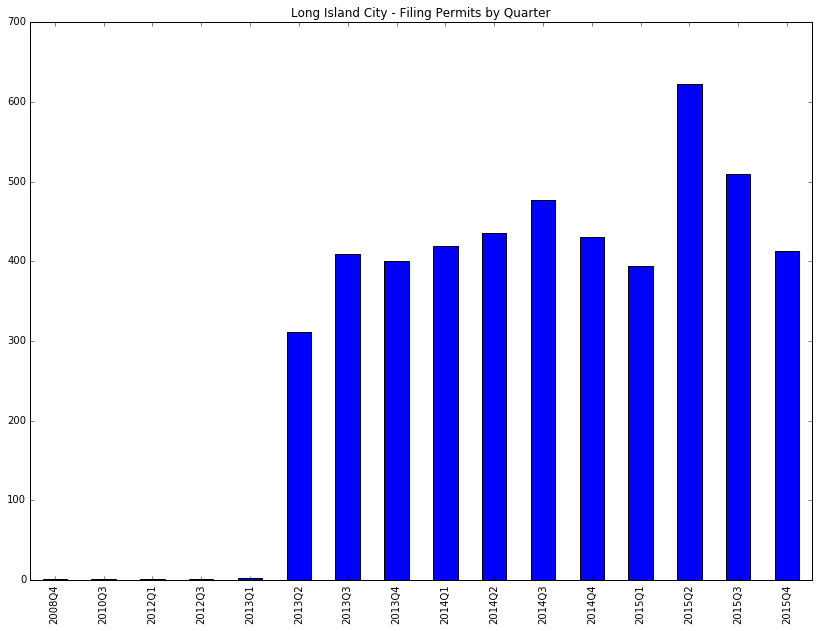

In [51]:
X = np.array(count_per_quarter[['Filing Date']]).squeeze()
Y = np.array(count_per_quarter[['Permit Type']]).squeeze()
ao = Series(Y, index=X)
ao.plot(kind='bar')
plt.title('Long Island City - Filing Permits by Quarter')
plt.show()

<b>Analysis 3 - Steady Increase of Filed Building Permits indicates increase in Real Estate Development</b><br>
This Histogram indicates that there was likely an anomaly with the data available from 2008 Q4 - 2013 Q1; this is likely attributed to missing data from the Open Data website.<br><br>
The 2013 Q2 - 2015 Q4 data does reveal an interesting observation, there is a consistent increase in building permits year-on-year, within "construction season". For contractors and developers, the construction season is typically within Q2 and Q3. This can be seen in the histogram with steady increases year-on-year. For Q1 and Q4 these numbers are almost static year-on-year, likely a result of seasonal or weather related work.<br><br>
The other interesting point with this data is that it could likely be used as a predictor with some reliability. If there was a means of getting the Filing Date and Permit Type on a more real-time basis, this could be very useful for market speculators.